# TUTORIAL 3 : Evolute of curves

The evolute of a curve is by definition the set of its centers of curvatures. The goal of this lab session is to define a generic function that computes the evolute of any parameterized curve. 

## PART I. 
We assume in the following that we have a parametrized curve $f:[a,b]\to\mathbb{R}^3$ which is only known through a discretization $(t,f)$ where $$\textit{t = np.linspace(0,1,n)}\quad f=(f(t_0),\cdots,f(t_{n-1})).$$
$f$ is therefore of size $3 \times n$.

## 1) Discrete derivative
Define a function that calculate an approximation of the derivative of $f$. The output has the same size than $t$ and $f$. 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

#----------------------
# discrete derivature
def derivative(t,func):
    # TO BE DONE
    h = t[1]-t[0]
    n = len(t)
    deriv = []
    for f in func:
        deriv.append(
            [(-3*f[0]+4*f[1]-f[2])] + 
            [(f[i+1]-f[i-1]) for i in range(1,n-1)] + 
            [(f[-3]-4*f[-2]+3*f[-1])]
        )
    deriv = np.array(deriv)/2/h
    return deriv

#---------------------
# check that function on simple examples



In [2]:
t = np.linspace(0,1,100)
y = np.array([np.sin(2*np.pi*t), np.cos(2*np.pi*t), t])

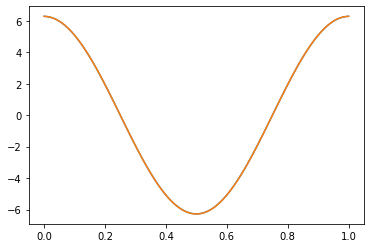

In [3]:
plt.plot(t, derivative(t, y)[0])
plt.plot(t, np.cos(2*np.pi*t)*2*np.pi)

In [4]:
plt.plot(t, derivative(t, y)[1])
plt.plot(t, -np.sin(2*np.pi*t)*2*np.pi)

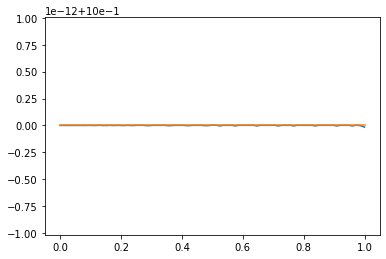

In [5]:
plt.plot(t, derivative(t, y)[2])
plt.plot(t, np.ones_like(t))

In [6]:
def norm(x):
    return np.sqrt(np.sum(x**2,0))

In [7]:
def normed(x):
    return x/norm(x)

## 2) Discrete normal vector
The goal is to build the function that outputs for every $t_i$ the unit normal $N(t_i)$.

In [8]:
#----------------------
# discrete derivature
def tangent_vector(t,f):
    # TO BE DONE
    T = normed(derivative(t, f))
    return T

In [9]:
#----------------------
# discrete derivature
def normal_vector(t,f):
    # TO BE DONE
    N = normed(derivative(t, tangent_vector(t,f)))
    return N

#---------------------
# check that function on simple examples

In [10]:
T = tangent_vector(t, y)
N = normal_vector(t, y)

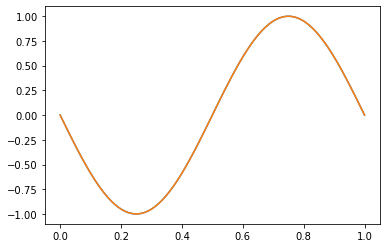

In [11]:
plt.plot(t, -np.sin(2*np.pi*t))
plt.plot(t, N[0])

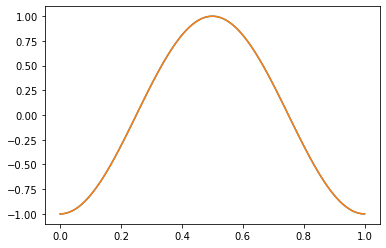

In [12]:
plt.plot(t, -np.cos(2*np.pi*t))
plt.plot(t, N[1])

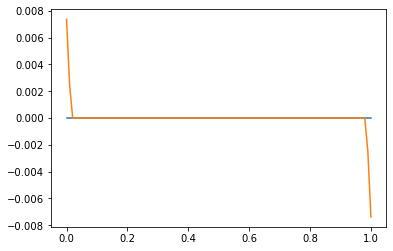

In [13]:
plt.plot(t, np.zeros_like(t))
plt.plot(t, N[2])

## 3) Curvature function
The goal is to build the function that outputs for every $t_i$ the curvature $k(t_i)$.

In [14]:
np.cross([1,0,0],[0,1,0])

array([0, 0, 1])

In [15]:
#----------------------
# discrete derivature
def curvature(t,f):
    # TO BE DONE
    f_prime = derivative(t,f)
    f_prime_prime = derivative(t,f_prime)
    return np.array([norm(np.cross(fp, fpp))/(norm(fp)**3) for fp, fpp in zip(f_prime.T, f_prime_prime.T)])
    return curvature_f # curvature_f is of size 1 x n

#---------------------
# check that function on simple examples



In [16]:
y = np.array([t, t**2, t**3])

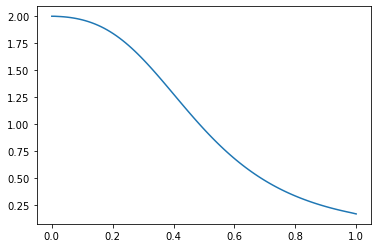

In [17]:
plt.plot(t, curvature(t,y))

## 4) Evolute 
Define the evolute, namely the set of centers of curvatures. 

In [18]:
#----------------------
# discrete derivature
def evolute(t,f):
    # TO BE DONE
    N = normal_vector(t,f)
    return f + N/curvature(t,f)
    return evolute_f # evolute_f is of size 3 x n



## PART II. 1) Evolute of the helicoid
Plot the evolute of the helicoid 
$$
\begin{array}{lllll}
\gamma :&\mathbb{R}&\to&\mathbb{R}^3\\ 
&t &\mapsto & (R\cos t, R \sin t, at).
\end{array}
$$

In [19]:
R = np.sqrt(2)
a = R
t = np.linspace(0,3*np.pi*2,1000)
y = np.array([R*np.cos(t), R*np.sin(t), a*t])

In [20]:
ev = evolute(t, y)

In [21]:
fig = plt.figure()
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
 
# defining all 3 axes
z2 = y[2]
x2 = y[0]
y2 = y[1]
 
# plotting
ax.plot3D(x2, y2, z2, 'red', label='heliod')
 
# defining all 3 axes
z3 = ev[2]
x3 = ev[0]
y3 = ev[1]
 
# plotting
ax.plot3D(x3, y3, z3, 'green', label='evolute')
plt.legend();
plt.show()

## 2) Evolute of the catenary
Plot the evolute of the catenary 
$$
\begin{array}{lllll}
\gamma :&\mathbb{R}&\to&\mathbb{R}^2\\ 
&t &\mapsto & (t,\cosh t).
\end{array}
$$

In [28]:
t = np.linspace(-1,1,1000)
y = np.array([t, np.cosh(t)])

In [29]:
ev = evolute(t, y)

In [43]:
plt.plot(y[0], y[1], label='catenary')
plt.plot(ev[0], ev[1], label='evolute')
plt.legend();

## 3) Evolute of Bezier curves
Plot the evolute of  Bezier curve that you created before.

In [25]:
from Tutorial2Bezier import *

In [26]:
Polygon = np.array([
    [-1,-1, 0, 1, 1],
    [0, 1, 1, 1, 0.]
])

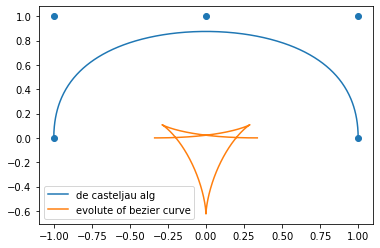

In [27]:
t = np.linspace(0,1,500) 
x = np.array([DeCasteljau(Polygon[0], z) for z in t]) 
y = np.array([DeCasteljau(Polygon[1], z) for z in t]) 
x, y = x[:,-1,-1], y[:,-1,-1]
ev = evolute(t, np.array([x,y]))
plt.scatter(Polygon[0], Polygon[1])
plt.plot(x, y, label='de casteljau alg')
plt.plot(ev[0], ev[1], label='evolute of bezier curve')
plt.legend();